# Imports

In [1]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


In [2]:
# Ignore all warnings
warnings.filterwarnings('ignore')

In [3]:
# Function for counting Nan values in each column
def count_nan_values(data):
    missing = data.isnull().sum()
    missing_percent = missing / len(df) * 100
    missing_df = pd.DataFrame({"missing": missing, "missing_percent": missing_percent})
    return missing_df

# EDA and Data preprocessing

In [4]:
def custom_box_plot_func(data_to_plot):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data_to_plot)
    plt.xticks(rotation=90)
    plt.title("Box plot for all numeric columns")
    plt.show()

def custom_heatmap_func(data_to_plot, title):
    plt.figure(figsize=(10, 6))
    sns.heatmap(data_to_plot, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [5]:
df = pd.read_csv("dataset_57_hypothyroid.csv", decimal=".", na_values="?")
df.head() 

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102.0,f,NaN,f,NaN,f,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175.0,f,NaN,f,NaN,f,NaN,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,negative


In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   float64
 1   sex                        3622 non-null   object 
 2   on_thyroxine               3772 non-null   object 
 3   query_on_thyroxine         3772 non-null   object 
 4   on_antithyroid_medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid_surgery            3772 non-null   object 
 8   I131_treatment             3772 non-null   object 
 9   query_hypothyroid          3772 non-null   object 
 10  query_hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

In [7]:
# Count the number and percents of missing values in each column
"""Considering the results, i will drop TBG and samples with missing values"""
missing_df = count_nan_values(df)
missing_df


,missing,missing_percent
age,1,0.026511
sex,150,3.976670
on_thyroxine,0,0.000000
query_on_thyroxine,0,0.000000
on_antithyroid_medication,0,0.000000
sick,0,0.000000
pregnant,0,0.000000
thyroid_surgery,0,0.000000
I131_treatment,0,0.000000
query_hypothyroid,0,0.000000


In [8]:
# Drop the TBG column

df = df.drop("TBG", axis=1)

# Drop the rows with missing values
df = df.dropna()

In [9]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 2643 entries, 0 to 3771
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2643 non-null   float64
 1   sex                        2643 non-null   object 
 2   on_thyroxine               2643 non-null   object 
 3   query_on_thyroxine         2643 non-null   object 
 4   on_antithyroid_medication  2643 non-null   object 
 5   sick                       2643 non-null   object 
 6   pregnant                   2643 non-null   object 
 7   thyroid_surgery            2643 non-null   object 
 8   I131_treatment             2643 non-null   object 
 9   query_hypothyroid          2643 non-null   object 
 10  query_hyperthyroid         2643 non-null   object 
 11  lithium                    2643 non-null   object 
 12  goitre                     2643 non-null   object 
 13  tumor                      2643 non-null   object 
 1

In [10]:
"""I will Scale or Normalize the data before training the model"""
df.describe()

,age,TSH,T3,TT4,T4U,FTI
count,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000
mean,53.081725,5.035978,2.001150,107.858683,0.995650,109.435906
std,20.367966,23.974851,0.823814,35.460437,0.196445,32.472156
min,1.000000,0.005000,0.050000,2.000000,0.250000,2.000000
25%,37.000000,0.500000,1.500000,88.000000,0.870000,93.000000
50%,55.000000,1.300000,2.000000,103.000000,0.980000,107.000000
75%,69.000000,2.600000,2.300000,124.000000,1.090000,124.000000
max,455.000000,530.000000,10.600000,430.000000,2.120000,395.000000


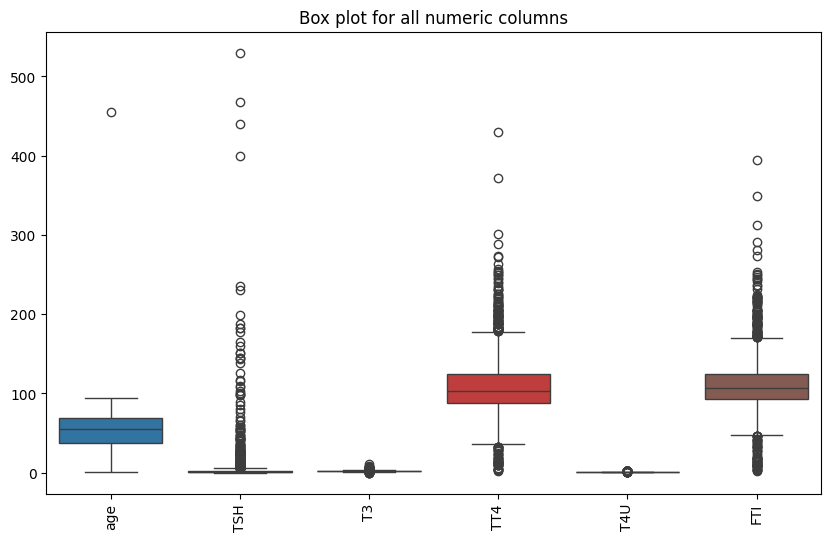

In [11]:
"""Some columns have a very high range of values, so i will use the MinMaxScaler to scale the data
also there are some features that seem to have low variance, so i will use VarianceThreshold to remove them"""
custom_box_plot_func(df)

In [12]:
# VarianceThreshold for numerical columns
"""All features passed the threshold, so i will not remove any feature"""

selector = VarianceThreshold(threshold=0.3)
selector.fit(df.select_dtypes(include="number"))

df.describe()

,age,TSH,T3,TT4,T4U,FTI
count,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000
mean,53.081725,5.035978,2.001150,107.858683,0.995650,109.435906
std,20.367966,23.974851,0.823814,35.460437,0.196445,32.472156
min,1.000000,0.005000,0.050000,2.000000,0.250000,2.000000
25%,37.000000,0.500000,1.500000,88.000000,0.870000,93.000000
50%,55.000000,1.300000,2.000000,103.000000,0.980000,107.000000
75%,69.000000,2.600000,2.300000,124.000000,1.090000,124.000000
max,455.000000,530.000000,10.600000,430.000000,2.120000,395.000000


In [13]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled = df.copy()
df_scaled[df.select_dtypes(include="number").columns] = scaler.fit_transform(df.select_dtypes(include="number"))

df_scaled.describe()

,age,TSH,T3,TT4,T4U,FTI
count,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000
mean,0.114717,0.009493,0.184943,0.247333,0.398744,0.273374
std,0.044863,0.045236,0.078087,0.082851,0.105051,0.082626
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.079295,0.000934,0.137441,0.200935,0.331551,0.231552
50%,0.118943,0.002443,0.184834,0.235981,0.390374,0.267176
75%,0.149780,0.004896,0.213270,0.285047,0.449198,0.310433
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
"""I definitely should remove columns with only one unique value, because they don't provide any information to the model
Also as categorical columns are binary, i will convert them to 0 and 1"""
df_scaled.describe(include="object")

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,hypopituitary,psych,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured,referral_source,Class
count,2643,2643,2643,2643,2643,2643,2643,2643,2643,2643,...,2643,2643,2643,2643,2643,2643,2643,2643,2643,2643
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,1,1,1,1,1,1,5,4
top,F,f,f,f,f,f,f,f,f,f,...,f,f,t,t,t,t,t,f,other,negative
freq,1764,2377,2619,2610,2530,2602,2610,2603,2497,2480,...,2642,2473,2643,2643,2643,2643,2643,2643,1237,2427


In [15]:
# Drop columns with only one unique value
unique_values = df_scaled.nunique()
unique_values = unique_values[unique_values == 1]

df_scaled = df_scaled.drop(unique_values.index, axis=1)

In [16]:
"""Unfortunately, dataset is purely balanced, i will consider something, like stratified sampling, if cross-validation won't be enough
Also, based on this information, and that target is not binary, as a matric i will use f1 score and also build confusion matrix"""
df_scaled.value_counts("Class")

Class
negative                   2427
compensated_hypothyroid     136
primary_hypothyroid          79
secondary_hypothyroid         1
Name: count, dtype: int64

In [17]:
# Convert categorical columns to 0 and 1

for column in df_scaled.select_dtypes(include="object"):
    if column == "Class":
        df_scaled[column] = df_scaled[column].map({"negative": 0, "compensated_hypothyroid": 1, "primary_hypothyroid": 2, "secondary_hypothyroid": 3})
    
    elif column == "sex":
        df_scaled[column] = df_scaled[column].map({"M": 0, "F": 1})
    
    elif column == "referral_source":
        df_scaled[column] = df_scaled[column].map({"SVHC": 0, "SVI": 1, "STMW": 2, "SVHD": 3, "other": 4})

    else:
        df_scaled[column] = df_scaled[column].map({"f": 0, "t": 1})

"Everthing seems fine"
missing_df = count_nan_values(df_scaled)
missing_df

,missing,missing_percent
age,0,0.0
sex,0,0.0
on_thyroxine,0,0.0
query_on_thyroxine,0,0.0
on_antithyroid_medication,0,0.0
sick,0,0.0
pregnant,0,0.0
thyroid_surgery,0,0.0
I131_treatment,0,0.0
query_hypothyroid,0,0.0


In [18]:
# Split the data into features and target
X = df_scaled.drop("Class", axis=1)
y = df_scaled["Class"]



# Models

In [19]:
def logistsic_regression_dealing(X, y, penalty, hyper_params):

    best_score = 0
    best_model = None
    best_C = None
    best_iter_amount = None

    for max_iter in hyper_params["max_iter"]:
        for c in hyper_params["C"]:
            model = LogisticRegression(max_iter=max_iter, random_state=1, C=c, penalty=penalty)
            scores = cross_val_score(model, X, y, cv=5, scoring="f1_micro")
            if scores.mean() > best_score:
                best_score = scores.mean()
                best_model = model
                best_C = c
                best_iter_amount=max_iter

    print("Best iteration amount:", best_iter_amount)
    print("Best model C:", best_C)
    print("Best F1 score:", best_score)

    return best_model


def knn_dealing(X, y, hyper_params):

    best_score = 0
    best_model = None
    best_n = None

    for n in hyper_params["n_neighbors"]:
        model = KNeighborsClassifier(n_neighbors=n)
        scores = cross_val_score(model, X, y, cv=5, scoring="f1_micro")
        if scores.mean() > best_score:
            best_score = scores.mean()
            best_model = model
            best_n = n

    print("Best n_neighbors:", best_n)
    print("Best F1 score:", best_score)

    return best_model

def model_dealing(X, y, title, penalty, hyper_params, model_type):

    if model_type == "logistic_regression":
        best_model = logistsic_regression_dealing(X, y, penalty, hyper_params)
    
    elif model_type == "knn":
        best_model = knn_dealing(X, y, hyper_params)

    # Confusion matrix
    best_model.fit(X, y)
    y_pred = best_model.predict(X)
    conf_matrix = confusion_matrix(y, y_pred)

    # Rename the columns and index
    conf_matrix = pd.DataFrame(conf_matrix, columns=["negative", "compensated_hypothyroid", "primary_hypothyroid", "secondary_hypothyroid"], index=["negative", "compensated_hypothyroid", "primary_hypothyroid", "secondary_hypothyroid"])

    custom_heatmap_func(conf_matrix, title)

Best iteration amount: 500
Best model C: 0.001
Best F1 score: 0.9670819728475684


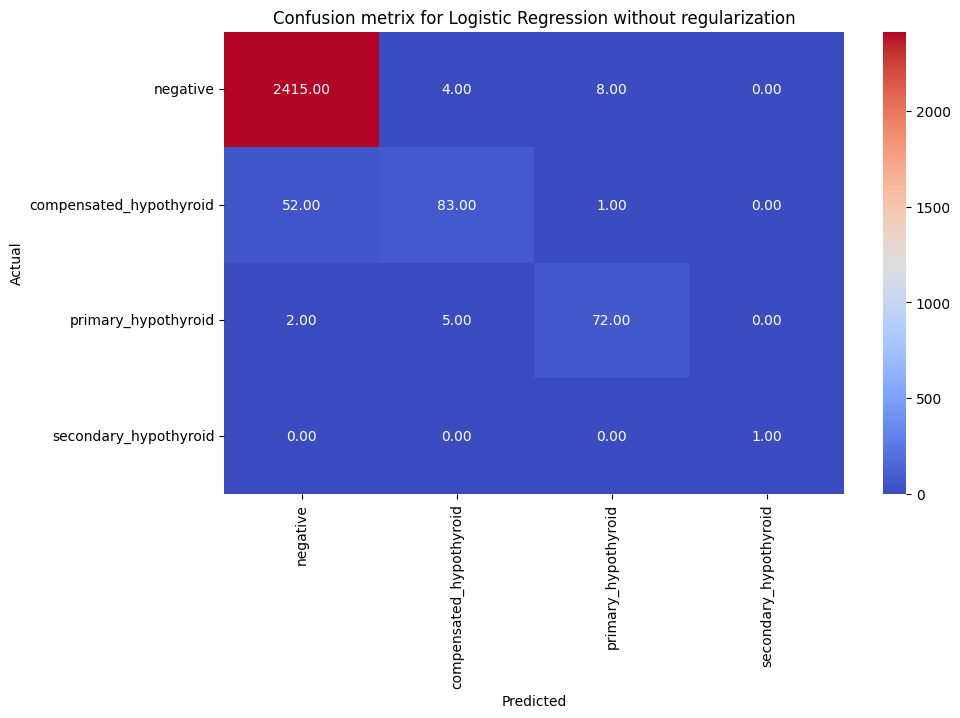

In [20]:
# Logistic Regression without regularization
"""Not bad, but we can observe not best predictions for compensated_hypothyroid, so i will try to use regularization"""

hyper_params = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], "max_iter": [100, 500, 1000]}

model_dealing(X, y, "Confusion metrix for Logistic Regression without regularization", None, hyper_params, "logistic_regression")



Best iteration amount: 500
Best model C: 10000
Best F1 score: 0.9667046170590595


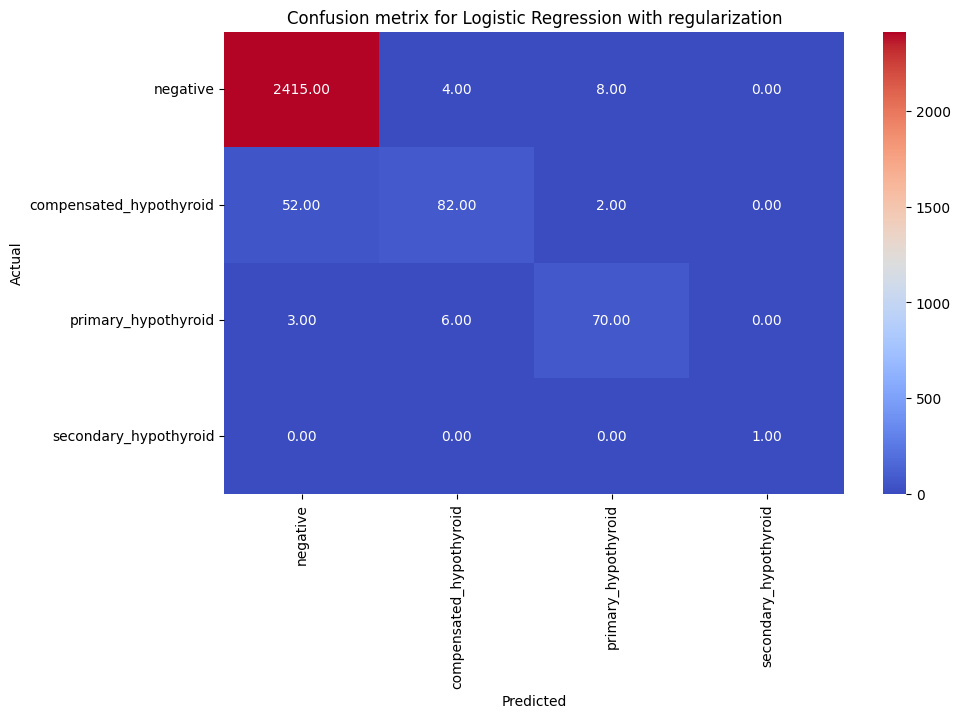

In [21]:
# Logistic Regression with regularization
"""Surprisingly, regularization shoed a little worse results, but they are almost the same"""

hyper_params = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], "max_iter": [100, 500, 1000]}

model_dealing(X, y, "Confusion metrix for Logistic Regression with regularization", "l2", hyper_params, "logistic_regression")



Best n_neighbors: 5
Best F1 score: 0.9318976628286647


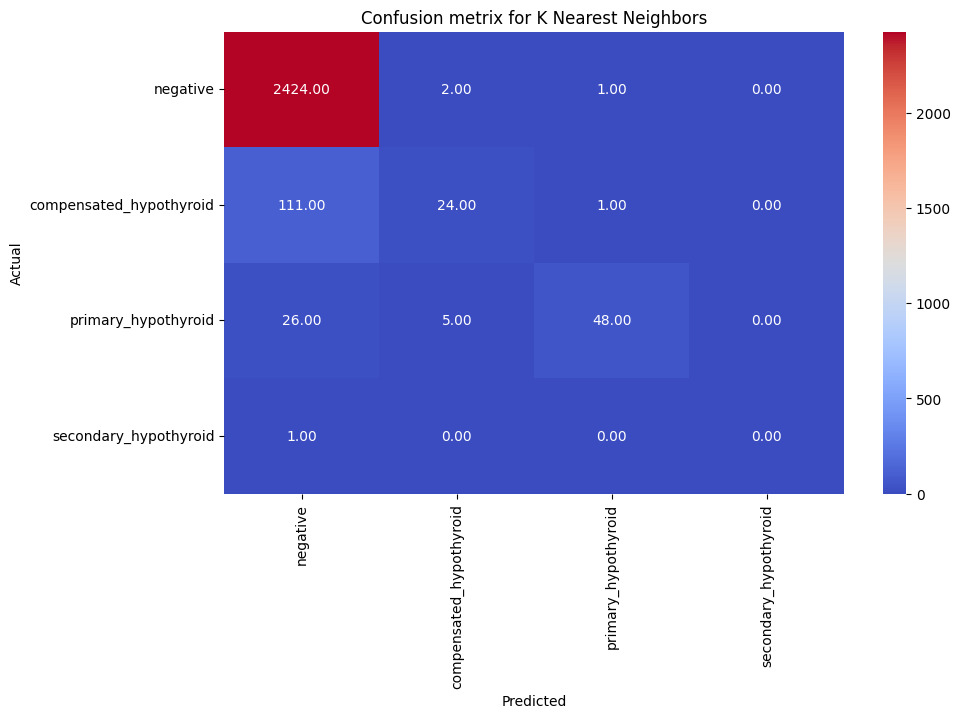

In [22]:
# K Nearest Neighbors
"""This model showed the worst results, as expected, because it is not the best model for this unbalanced dataset"""

hyper_params = {"n_neighbors": [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]}

model_dealing(X, y, "Confusion metrix for K Nearest Neighbors", None, hyper_params, "knn")